# CoinMarketCap API Project

## Project Overview
This project demonstrates the use of the CoinMarketCap API to collect, store, process, and visualize real-time cryptocurrency market data. The workflow includes:

- Data Collection: Automatically fetches data on the top 15 cryptocurrencies (by market cap) at 1-minute intervals using the CoinMarketCap API. The data is normalized and appended to a CSV file for persistent storage.

- Data Preprocessing: Cleans and filters the dataset to keep only the most recent data for each coin. Handles sorting by timestamp and cmc_rank to ensure data relevance.

- Analysis:
  - Calculates average percentage changes (1h, 24h, 7d, 30d, 60d, 90d) for each cryptocurrency
  - Transforms the data for easy visualization.

- Visualization:
  - A point plot is created to compare percentage changes across different time intervals for each cryptocurrency.
  - A line plot is generated to show historical price trends of a selected coin (e.g., Bitcoin) over time.



## Data Collection

In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '6a711650-4bf2-4628-860b-a00eb07d67da',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-05-12T07:16:13.849Z', 'error_code': 0, 'error_message': None, 'elapsed': 18, 'credit_count': 1, 'notice': None, 'total_count': 9788}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12062, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
import pandas as pd

# Configure pandas to display all columns and rows when printing DataFrames
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Normalize the data and add a new timeframe column

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

id         name symbol       slug  num_market_pairs  \
0       1      Bitcoin    BTC    bitcoin             12062   
1    1027     Ethereum    ETH   ethereum             10287   
2     825  Tether USDt   USDT     tether            127386   
3      52          XRP    XRP        xrp              1605   
4    1839          BNB    BNB        bnb              2520   
5    5426       Solana    SOL     solana               913   
6    3408         USDC   USDC   usd-coin             27748   
7      74     Dogecoin   DOGE   dogecoin              1218   
8    2010      Cardano    ADA    cardano              1513   
9    1958         TRON    TRX       tron              1173   
10  20947          Sui    SUI        sui               646   
11   1975    Chainlink   LINK  chainlink              2005   
12   5805    Avalanche   AVAX  avalanche               911   
13  35697           Pi     PI         pi                54   
14   5994    Shiba Inu   SHIB  shiba-inu               962   

                  date_added  \
0   2010-07-13T00:00:00.000Z   
1   2015-08-07T00:00:00.000Z   
2   2015-02-25T00:00:00.000Z   
3   2013-08-04T00:00:00.000Z   
4   2017-07-25T00:00:00.000Z   
5   2020-04-10T00:00:00.000Z   
6   2018-10-08T00:00:00.000Z   
7   2013-12-15T00:00:00.000Z   
8   2017-10-01T00:00:00.000Z   
9   2017-09-13T00:00:00.000Z   
10  2022-07-12T08:03:11.000Z   
11  2017-09-20T00:00:00.000Z   
12  2020-07-13T00:00:00.000Z   
13  2025-02-11T07:16:10.000Z   
14  2020-08-01T00:00:00.000Z   

                                                 tags    max_supply  \
0   [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1   [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2   [stablecoin, asset-backed-stablecoin, usd-stab...           NaN   
3   [medium-of-exchange, enterprise-solutions, xrp...  1.000000e+11   
4   [marketplace, centralized-exchange, payments, ...           NaN   
5   [pos, platform, solana-ecosystem, cms-holdings...           NaN   
6   [medium-of-exchange, stablecoin, asset-backed-...           NaN   
7   [mineable, pow, scrypt, medium-of-exchange, me...           NaN   
8   [dpos, pos, platform, research, smart-contract...  4.500000e+10   
9   [media, payments, tron-ecosystem, layer-1, dwf...           NaN   
10  [binance-launchpool, coinbase-ventures-portfol...  1.000000e+10   
11  [platform, defi, oracles, smart-contracts, eth...           NaN   
12  [defi, smart-contracts, three-arrows-capital-p...  7.157487e+08   
13                           [layer-1, mobile-mining]  1.000000e+11   
14  [memes, ethereum-ecosystem, doggone-doggerel, ...  5.895527e+14   

    circulating_supply  total_supply  infinite_supply  platform  cmc_rank  \
0         1.986364e+07  1.986364e+07            False       NaN         1   
1         1.207297e+08  1.207297e+08             True       NaN         2   
2         1.499781e+11  1.535083e+11             True       NaN         3   
3         5.855045e+10  9.998615e+10            False       NaN         4   
4         1.408890e+08  1.408890e+08            False       NaN         5   
5         5.193213e+08  6.005030e+08             True       NaN         6   
6         6.075653e+10  6.075653e+10            False       NaN         7   
7         1.492288e+11  1.492288e+11             True       NaN         8   
8         3.531295e+10  4.499460e+10            False       NaN         9   
9         9.491016e+10  9.491013e+10             True       NaN        10   
10        3.338327e+09  1.000000e+10            False       NaN        11   
11        6.571000e+08  1.000000e+09            False       NaN        12   
12        4.183560e+08  4.550255e+08            False       NaN        13   
13        7.075059e+09  1.000000e+11            False       NaN        14   
14        5.892499e+14  5.895043e+14            False       NaN        15   

    self_reported_circulating_supply  self_reported_market_cap tvl_ratio  \
0                                NaN                   

In [4]:
def api_runner():
    global df

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start': '1',
        'limit': '15',
        'convert': 'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '6a711650-4bf2-4628-860b-a00eb07d67da',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        print(f"Data retrieved at: {pd.to_datetime('now')}")
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(f"API request failed: {e}")
        return  # Exit the function early if error

    # Normalize nested JSON into flat table and add timestamp
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    # Define output CSV path
    csv_path = '/Users/rafihidayat/Desktop/Desktop - Rafi’s MacBook Pro/portfolio_projects/CMC API/CMC.csv'

    # Save the data to CSV: create a new file or append to existing
    if not os.path.isfile(csv_path):
        df.to_csv(csv_path, header=True, index=False)
    else:
        df.to_csv(csv_path, mode='a', header=False, index=False)

### Automated Data Collection Loop

The following loop automates the execution of the `api_runner()` function every 60 seconds for a total of 300 iterations (~5 hours). This setup is useful for building a time-series dataset of real-time cryptocurrency data from the CoinMarketCap API. 

Each iteration:
- Retrieves the latest data on the top 15 cryptocurrencies.
- Appends the data to a CSV file while adding a timestamp.
- Waits for 60 seconds before the next API call.

In [5]:
import os
from time import time
from time import sleep

# Loop to run every minute
for i in range(300):
    api_runner()  # Call the function to fetch and store crypto data
    print(f"[{i + 1}/300] API Runner completed successfully.")
    sleep(60)  # Wait for 1 minute

Data retrieved at: 2025-05-12 14:16:18.711820
[1/300] API Runner completed successfully.
Data retrieved at: 2025-05-12 14:17:19.633755
[2/300] API Runner completed successfully.


KeyboardInterrupt: 

## Data Preprocessing

In [6]:
df1 = pd.read_csv('/Users/rafihidayat/Desktop/Desktop - Rafi’s MacBook Pro/portfolio_projects/CMC API/CMC.csv')
df1

id         name symbol       slug  num_market_pairs  \
0         1      Bitcoin    BTC    bitcoin             12062   
1      1027     Ethereum    ETH   ethereum             10285   
2       825  Tether USDt   USDT     tether            127304   
3        52          XRP    XRP        xrp              1605   
4      1839          BNB    BNB        bnb              2519   
5      5426       Solana    SOL     solana               913   
6      3408         USDC   USDC   usd-coin             27708   
7        74     Dogecoin   DOGE   dogecoin              1218   
8      2010      Cardano    ADA    cardano              1513   
9      1958         TRON    TRX       tron              1173   
10    20947          Sui    SUI        sui               643   
11     1975    Chainlink   LINK  chainlink              2005   
12     5805    Avalanche   AVAX  avalanche               911   
13      512      Stellar    XLM    stellar               706   
14     5994    Shiba Inu   SHIB  shiba-inu               962   
15        1      Bitcoin    BTC    bitcoin             12062   
16     1027     Ethereum    ETH   ethereum             10285   
17      825  Tether USDt   USDT     tether            127304   
18       52          XRP    XRP        xrp              1605   
19     1839          BNB    BNB        bnb              2519   
20     5426       Solana    SOL     solana               913   
21     3408         USDC   USDC   usd-coin             27708   
22       74     Dogecoin   DOGE   dogecoin              1218   
23     2010      Cardano    ADA    cardano              1513   
24     1958         TRON    TRX       tron              1173   
25    20947          Sui    SUI        sui               643   
26     1975    Chainlink   LINK  chainlink              2005   
27     5805    Avalanche   AVAX  avalanche               911   
28      512      Stellar    XLM    stellar               706   
29     5994    Shiba Inu   SHIB  shiba-inu               962   
30        1      Bitcoin    BTC    bitcoin             12062   
31     1027     Ethereum    ETH   ethereum             10285   
32      825  Tether USDt   USDT     tether            127304   
33       52          XRP    XRP        xrp              1605   
34     1839          BNB    BNB        bnb              2519   
35     5426       Solana    SOL     solana               913   
36     3408         USDC   USDC   usd-coin             27708   
37       74     Dogecoin   DOGE   dogecoin              1218   
38     2010      Cardano    ADA    cardano              1513   
39     1958         TRON    TRX       tron              1173   
40    20947          Sui    SUI        sui               643   
41     1975    Chainlink   LINK  chainlink              2005   
42     5805    Avalanche   AVAX  avalanche               911   
43      512      Stellar    XLM    stellar               706   
44     5994    Shiba Inu   SHIB  shiba-inu               962   
45        1      Bitcoin    BTC    bitcoin             12062   
46     1027     Ethereum    ETH   ethereum             10285   
47      825  Tether USDt   USDT     tether            127305   
48       52          XRP    XRP        xrp              1605   
49     1839          BNB    BNB        bnb              2519   
50     5426       Solana    SOL     solana               913   
51     3408         USDC   USDC   usd-coin             27710   
52       74     Dogecoin   DOGE   dogecoin              1218   
53     2010      Cardano    ADA    cardano              1513   
54     1958         TRON    TRX       tron              1173   
55    20947          Sui    SUI        sui               643   
56     1975    Chainlink   LINK  chainlink              2005   
57     5805    Avalanche   AVAX  avalanche               911   
58      512      Stellar    XLM    stellar               706   
59     5994    Shiba Inu   SHIB  shiba-inu               962   
60        1      Bitcoin    BTC    bitcoin             12062   
61     1027     Ethereum    ETH   ethereu

In [7]:
# Set pandas to display all float values with 5 decimal places
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [8]:
df1

id         name symbol       slug  num_market_pairs  \
0         1      Bitcoin    BTC    bitcoin             12062   
1      1027     Ethereum    ETH   ethereum             10285   
2       825  Tether USDt   USDT     tether            127304   
3        52          XRP    XRP        xrp              1605   
4      1839          BNB    BNB        bnb              2519   
5      5426       Solana    SOL     solana               913   
6      3408         USDC   USDC   usd-coin             27708   
7        74     Dogecoin   DOGE   dogecoin              1218   
8      2010      Cardano    ADA    cardano              1513   
9      1958         TRON    TRX       tron              1173   
10    20947          Sui    SUI        sui               643   
11     1975    Chainlink   LINK  chainlink              2005   
12     5805    Avalanche   AVAX  avalanche               911   
13      512      Stellar    XLM    stellar               706   
14     5994    Shiba Inu   SHIB  shiba-inu               962   
15        1      Bitcoin    BTC    bitcoin             12062   
16     1027     Ethereum    ETH   ethereum             10285   
17      825  Tether USDt   USDT     tether            127304   
18       52          XRP    XRP        xrp              1605   
19     1839          BNB    BNB        bnb              2519   
20     5426       Solana    SOL     solana               913   
21     3408         USDC   USDC   usd-coin             27708   
22       74     Dogecoin   DOGE   dogecoin              1218   
23     2010      Cardano    ADA    cardano              1513   
24     1958         TRON    TRX       tron              1173   
25    20947          Sui    SUI        sui               643   
26     1975    Chainlink   LINK  chainlink              2005   
27     5805    Avalanche   AVAX  avalanche               911   
28      512      Stellar    XLM    stellar               706   
29     5994    Shiba Inu   SHIB  shiba-inu               962   
30        1      Bitcoin    BTC    bitcoin             12062   
31     1027     Ethereum    ETH   ethereum             10285   
32      825  Tether USDt   USDT     tether            127304   
33       52          XRP    XRP        xrp              1605   
34     1839          BNB    BNB        bnb              2519   
35     5426       Solana    SOL     solana               913   
36     3408         USDC   USDC   usd-coin             27708   
37       74     Dogecoin   DOGE   dogecoin              1218   
38     2010      Cardano    ADA    cardano              1513   
39     1958         TRON    TRX       tron              1173   
40    20947          Sui    SUI        sui               643   
41     1975    Chainlink   LINK  chainlink              2005   
42     5805    Avalanche   AVAX  avalanche               911   
43      512      Stellar    XLM    stellar               706   
44     5994    Shiba Inu   SHIB  shiba-inu               962   
45        1      Bitcoin    BTC    bitcoin             12062   
46     1027     Ethereum    ETH   ethereum             10285   
47      825  Tether USDt   USDT     tether            127305   
48       52          XRP    XRP        xrp              1605   
49     1839          BNB    BNB        bnb              2519   
50     5426       Solana    SOL     solana               913   
51     3408         USDC   USDC   usd-coin             27710   
52       74     Dogecoin   DOGE   dogecoin              1218   
53     2010      Cardano    ADA    cardano              1513   
54     1958         TRON    TRX       tron              1173   
55    20947          Sui    SUI        sui               643   
56     1975    Chainlink   LINK  chainlink              2005   
57     5805    Avalanche   AVAX  avalanche               911   
58      512      Stellar    XLM    stellar               706   
59     5994    Shiba Inu   SHIB  shiba-inu               962   
60        1      Bitcoin    BTC    bitcoin             12062   
61     1027     Ethereum    ETH   ethereu

In [9]:
# Convert timestamp column to datetime format
df1['timestamp'] = pd.to_datetime(df1['timestamp'])

# Sort the DataFrame first by timestamp then by cmc_rank
df2 = df1.sort_values(by=['timestamp', 'cmc_rank'], ascending=[False, True])


# Keep only the latest record for each cryptocurrency based on name
df2 = df2.drop_duplicates(subset='name', keep='first').reset_index(drop=True)

# Group by crypto name
df2 = df2.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h',
           'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
           'quote.USD.percent_change_90d']].mean()

df2

quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
name                                                                     
Bitcoin                          1.59297                       1.84919   
Ethereum                         2.84807                       2.91528   
Tether USDt                     -0.07788                      -0.09103   
XRP                              1.42570                       2.28060   
BNB                              1.18493                       0.96284   
Solana                           2.40755                       2.90240   
USDC                             0.02838                       0.04948   
Dogecoin                         4.31824                       6.96923   
Cardano                          2.10185                       4.35200   
TRON                             1.31830                       1.60278   
Sui                              1.21020                       6.48310   
Chainlink                        3.25372                       6.12152   
Avalanche                        4.71643                       6.36747   
Pi                               7.22916                      55.79819   
Shiba Inu                        3.52036                       5.54922   
Stellar                          0.58626                      -0.13982   

             quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
name                                                                     
Bitcoin                         11.61890                      26.26355   
Ethereum                        41.26284                      62.82524   
Tether USDt                     -0.08420                      -0.04807   
XRP                             11.72136                      18.68216   
BNB                             12.17583                      12.89646   
Solana                          21.89343                      45.33913   
USDC                             0.01702                       0.03754   
Dogecoin                        43.96917                      52.65847   
Cardano                         21.37742                      31.02255   
TRON                             7.32204                       7.58274   
Sui                             25.14578                      92.63800   
Chainlink                       24.94174                      38.26615   
Avalanche                       32.18597                      37.66552   
Pi                             149.82722                     120.83095   
Shiba Inu                       31.15512                      37.86226   
Stellar                         15.43640                      31.68627   

             quote.USD.percent_change_60d  quote.USD.percent_change_90d  
name                                                                     
Bitcoin                          26.82019                       7.30185  
Ethereum                         37.13886                      -5.47493  
Tether USDt                      -0.06308                      -0.09591  
XRP                               8.79968                      -3.51406  
BNB                              14.90596                       4.13463  
Solana                           44.67805                     -12.73057  
USDC                              0.03895                       0.01984  
Dogecoin                         48.07222                      -6.90997  
Cardano                          15.95144                       4.57825  
TRON                             18.90041                       8.36899  
Sui                              88.54128                      19.91149  
Chainlink                        33.70417                     -10.69320  
Avalanche                        40.58010                      -1.36450  
Pi                              -14.19001                     -13.26336  
Shiba Inu                        39.55466                       3.24775  
Stellar                          18.07065                      -5.87258

In [10]:
# Stack the DataFrame to transform the percent change metrics into a single column
df3 = df2.stack()
df3

name                                     
Bitcoin      quote.USD.percent_change_1h      1.59297
             quote.USD.percent_change_24h     1.84919
             quote.USD.percent_change_7d     11.61890
             quote.USD.percent_change_30d    26.26355
             quote.USD.percent_change_60d    26.82019
             quote.USD.percent_change_90d     7.30185
Ethereum     quote.USD.percent_change_1h      2.84807
             quote.USD.percent_change_24h     2.91528
             quote.USD.percent_change_7d     41.26284
             quote.USD.percent_change_30d    62.82524
             quote.USD.percent_change_60d    37.13886
             quote.USD.percent_change_90d    -5.47493
Tether USDt  quote.USD.percent_change_1h     -0.07788
             quote.USD.percent_change_24h    -0.09103
             quote.USD.percent_change_7d     -0.08420
             quote.USD.percent_change_30d    -0.04807
             quote.USD.percent_change_60d    -0.06308
             quote.USD.percent_change_90

In [11]:
# Make it back to dataframe
df4 = df3.to_frame(name='values')
df4

values
name                                              
Bitcoin     quote.USD.percent_change_1h    1.59297
            quote.USD.percent_change_24h   1.84919
            quote.USD.percent_change_7d   11.61890
            quote.USD.percent_change_30d  26.26355
            quote.USD.percent_change_60d  26.82019
            quote.USD.percent_change_90d   7.30185
Ethereum    quote.USD.percent_change_1h    2.84807
            quote.USD.percent_change_24h   2.91528
            quote.USD.percent_change_7d   41.26284
            quote.USD.percent_change_30d  62.82524
            quote.USD.percent_change_60d  37.13886
            quote.USD.percent_change_90d  -5.47493
Tether USDt quote.USD.percent_change_1h   -0.07788
            quote.USD.percent_change_24h  -0.09103
            quote.USD.percent_change_7d   -0.08420
            quote.USD.percent_change_30d  -0.04807
            quote.USD.percent_change_60d  -0.06308
            quote.USD.percent_change_90d  -0.09591
XRP         quote.USD.percent_change_1h    1.42570
            quote.USD.percent_change_24h   2.28060
            quote.USD.percent_change_7d   11.72136
            quote.USD.percent_change_30d  18.68216
            quote.USD.percent_change_60d   8.79968
            quote.USD.percent_change_90d  -3.51406
BNB         quote.USD.percent_change_1h    1.18493
            quote.USD.percent_change_24h   0.96284
            quote.USD.percent_change_7d   12.17583
            quote.USD.percent_change_30d  12.89646
            quote.USD.percent_change_60d  14.90596
            quote.USD.percent_change_90d   4.13463
Solana      quote.USD.percent_change_1h    2.40755
            quote.USD.percent_change_24h   2.90240
            quote.USD.percent_change_7d   21.89343
            quote.USD.percent_change_30d  45.33913
            quote.USD.percent_change_60d  44.67805
            quote.USD.percent_change_90d -12.73057
USDC        quote.USD.percent_change_1h    0.02838
            quote.USD.percent_change_24h   0.04948
            quote.USD.percent_change_7d    0.01702
            quote.USD.percent_change_30d   0.03754
            quote.USD.percent_change_60d   0.03895
            quote.USD.percent_change_90d   0.01984
Dogecoin    quote.USD.percent_change_1h    4.31824
            quote.USD.percent_change_24h   6.96923
            quote.USD.percent_change_7d   43.96917
            quote.USD.percent_change_30d  52.65847
            quote.USD.percent_change_60d  48.07222
            quote.USD.percent_change_90d  -6.90997
Cardano     quote.USD.percent_change_1h    2.10185
            quote.USD.percent_change_24h   4.35200
            quote.USD.percent_change_7d   21.37742
            quote.USD.percent_change_30d  31.02255
            quote.USD.percent_change_60d  15.95144
            quote.USD.percent_change_90d   4.57825
TRON        quote.USD.percent_change_1h    1.31830
            quote.USD.percent_change_24h   1.60278
            quote.USD.percent_change_7d    7.32204
            quote.USD.percent_change_30d   7.58274
            quote.USD.percent_change_60d  18.90041
            quote.USD.percent_change_90d   8.36899
Sui         quote.USD.percent_change_1h    1.21020
            quote.USD.percent_change_24h   6.48310
            quote.USD.percent_change_7d   25.14578
            quote.USD.percent_change_30d  92.63800
            quote.USD.percent_change_60d  88.54128
            quote.USD.percent_change_90d  19.91149
Chainlink   quote.USD.percent_change_1h    3.25372
            quote.USD.percent_change_24h   6.12152
            quote.USD.percent_change_7d   24.94174
            quote.USD.percent_change_30d  38.26615
            quote.USD.percent_change_60d  33.70417
            quote.USD.percent_change_90d -10.69320
Avalanche   quote.USD.percent_change_1h    4.71643
            quote.USD.percent_change_24h   6.36747
            quote.USD.percent_change_7d   32.18597
            quote.USD.percent_change_30d  37.66552
            quote.USD.percent_change_60d  40.58010
            quo

In [12]:
# Make an index
index = pd.Index(range(90))

df5 = df4.reset_index()
df5

name                       level_1    values
0       Bitcoin   quote.USD.percent_change_1h   1.59297
1       Bitcoin  quote.USD.percent_change_24h   1.84919
2       Bitcoin   quote.USD.percent_change_7d  11.61890
3       Bitcoin  quote.USD.percent_change_30d  26.26355
4       Bitcoin  quote.USD.percent_change_60d  26.82019
5       Bitcoin  quote.USD.percent_change_90d   7.30185
6      Ethereum   quote.USD.percent_change_1h   2.84807
7      Ethereum  quote.USD.percent_change_24h   2.91528
8      Ethereum   quote.USD.percent_change_7d  41.26284
9      Ethereum  quote.USD.percent_change_30d  62.82524
10     Ethereum  quote.USD.percent_change_60d  37.13886
11     Ethereum  quote.USD.percent_change_90d  -5.47493
12  Tether USDt   quote.USD.percent_change_1h  -0.07788
13  Tether USDt  quote.USD.percent_change_24h  -0.09103
14  Tether USDt   quote.USD.percent_change_7d  -0.08420
15  Tether USDt  quote.USD.percent_change_30d  -0.04807
16  Tether USDt  quote.USD.percent_change_60d  -0.06308
17  Tether USDt  quote.USD.percent_change_90d  -0.09591
18          XRP   quote.USD.percent_change_1h   1.42570
19          XRP  quote.USD.percent_change_24h   2.28060
20          XRP   quote.USD.percent_change_7d  11.72136
21          XRP  quote.USD.percent_change_30d  18.68216
22          XRP  quote.USD.percent_change_60d   8.79968
23          XRP  quote.USD.percent_change_90d  -3.51406
24          BNB   quote.USD.percent_change_1h   1.18493
25          BNB  quote.USD.percent_change_24h   0.96284
26          BNB   quote.USD.percent_change_7d  12.17583
27          BNB  quote.USD.percent_change_30d  12.89646
28          BNB  quote.USD.percent_change_60d  14.90596
29          BNB  quote.USD.percent_change_90d   4.13463
30       Solana   quote.USD.percent_change_1h   2.40755
31       Solana  quote.USD.percent_change_24h   2.90240
32       Solana   quote.USD.percent_change_7d  21.89343
33       Solana  quote.USD.percent_change_30d  45.33913
34       Solana  quote.USD.percent_change_60d  44.67805
35       Solana  quote.USD.percent_change_90d -12.73057
36         USDC   quote.USD.percent_change_1h   0.02838
37         USDC  quote.USD.percent_change_24h   0.04948
38         USDC   quote.USD.percent_change_7d   0.01702
39         USDC  quote.USD.percent_change_30d   0.03754
40         USDC  quote.USD.percent_change_60d   0.03895
41         USDC  quote.USD.percent_change_90d   0.01984
42     Dogecoin   quote.USD.percent_change_1h   4.31824
43     Dogecoin  quote.USD.percent_change_24h   6.96923
44     Dogecoin   quote.USD.percent_change_7d  43.96917
45     Dogecoin  quote.USD.percent_change_30d  52.65847
46     Dogecoin  quote.USD.percent_change_60d  48.07222
47     Dogecoin  quote.USD.percent_change_90d  -6.90997
48      Cardano   quote.USD.percent_change_1h   2.10185
49      Cardano  quote.USD.percent_change_24h   4.35200
50      Cardano   quote.USD.percent_change_7d  21.37742
51      Cardano  quote.USD.percent_change_30d  31.02255
52      Cardano  quote.USD.percent_change_60d  15.95144
53      Cardano  quote.USD.percent_change_90d   4.57825
54         TRON   quote.USD.percent_change_1h   1.31830
55         TRON  quote.USD.percent_change_24h   1.60278
56         TRON   quote.USD.percent_change_7d   7.32204
57         TRON  quote.USD.percent_change_30d   7.58274
58         TRON  quote.USD.percent_change_60d  18.90041
59         TRON  quote.USD.percent_change_90d   8.36899
60          Sui   quote.USD.percent_change_1h   1.21020
61          Sui  quote.USD.percent_change_24h   6.48310
62          Sui   quote.USD.percent_change_7d  25.14578
63          Sui  quote.USD.percent_change_30d  92.63800
64          Sui  quote.USD.percent_change_60d  88.54128
65          Sui  quote.USD.percent_change_90d  19.91149
66    Chainlink   quote.USD.percent_change_1h   3.25372
67    Chainlink  quote.USD.percent_change_24h   6.12152
68    Chainlink   quote.USD.percent_change_7d  24.94174
69    Chainlink  quote.USD.percent_change_30d  38.26615
70    Chainlink  quote.USD.percent_

In [13]:
# Rename the second level index column
df6 = df5.rename(columns={'level_1': 'parameters'})
df6

name                    parameters    values
0       Bitcoin   quote.USD.percent_change_1h   1.59297
1       Bitcoin  quote.USD.percent_change_24h   1.84919
2       Bitcoin   quote.USD.percent_change_7d  11.61890
3       Bitcoin  quote.USD.percent_change_30d  26.26355
4       Bitcoin  quote.USD.percent_change_60d  26.82019
5       Bitcoin  quote.USD.percent_change_90d   7.30185
6      Ethereum   quote.USD.percent_change_1h   2.84807
7      Ethereum  quote.USD.percent_change_24h   2.91528
8      Ethereum   quote.USD.percent_change_7d  41.26284
9      Ethereum  quote.USD.percent_change_30d  62.82524
10     Ethereum  quote.USD.percent_change_60d  37.13886
11     Ethereum  quote.USD.percent_change_90d  -5.47493
12  Tether USDt   quote.USD.percent_change_1h  -0.07788
13  Tether USDt  quote.USD.percent_change_24h  -0.09103
14  Tether USDt   quote.USD.percent_change_7d  -0.08420
15  Tether USDt  quote.USD.percent_change_30d  -0.04807
16  Tether USDt  quote.USD.percent_change_60d  -0.06308
17  Tether USDt  quote.USD.percent_change_90d  -0.09591
18          XRP   quote.USD.percent_change_1h   1.42570
19          XRP  quote.USD.percent_change_24h   2.28060
20          XRP   quote.USD.percent_change_7d  11.72136
21          XRP  quote.USD.percent_change_30d  18.68216
22          XRP  quote.USD.percent_change_60d   8.79968
23          XRP  quote.USD.percent_change_90d  -3.51406
24          BNB   quote.USD.percent_change_1h   1.18493
25          BNB  quote.USD.percent_change_24h   0.96284
26          BNB   quote.USD.percent_change_7d  12.17583
27          BNB  quote.USD.percent_change_30d  12.89646
28          BNB  quote.USD.percent_change_60d  14.90596
29          BNB  quote.USD.percent_change_90d   4.13463
30       Solana   quote.USD.percent_change_1h   2.40755
31       Solana  quote.USD.percent_change_24h   2.90240
32       Solana   quote.USD.percent_change_7d  21.89343
33       Solana  quote.USD.percent_change_30d  45.33913
34       Solana  quote.USD.percent_change_60d  44.67805
35       Solana  quote.USD.percent_change_90d -12.73057
36         USDC   quote.USD.percent_change_1h   0.02838
37         USDC  quote.USD.percent_change_24h   0.04948
38         USDC   quote.USD.percent_change_7d   0.01702
39         USDC  quote.USD.percent_change_30d   0.03754
40         USDC  quote.USD.percent_change_60d   0.03895
41         USDC  quote.USD.percent_change_90d   0.01984
42     Dogecoin   quote.USD.percent_change_1h   4.31824
43     Dogecoin  quote.USD.percent_change_24h   6.96923
44     Dogecoin   quote.USD.percent_change_7d  43.96917
45     Dogecoin  quote.USD.percent_change_30d  52.65847
46     Dogecoin  quote.USD.percent_change_60d  48.07222
47     Dogecoin  quote.USD.percent_change_90d  -6.90997
48      Cardano   quote.USD.percent_change_1h   2.10185
49      Cardano  quote.USD.percent_change_24h   4.35200
50      Cardano   quote.USD.percent_change_7d  21.37742
51      Cardano  quote.USD.percent_change_30d  31.02255
52      Cardano  quote.USD.percent_change_60d  15.95144
53      Cardano  quote.USD.percent_change_90d   4.57825
54         TRON   quote.USD.percent_change_1h   1.31830
55         TRON  quote.USD.percent_change_24h   1.60278
56         TRON   quote.USD.percent_change_7d   7.32204
57         TRON  quote.USD.percent_change_30d   7.58274
58         TRON  quote.USD.percent_change_60d  18.90041
59         TRON  quote.USD.percent_change_90d   8.36899
60          Sui   quote.USD.percent_change_1h   1.21020
61          Sui  quote.USD.percent_change_24h   6.48310
62          Sui   quote.USD.percent_change_7d  25.14578
63          Sui  quote.USD.percent_change_30d  92.63800
64          Sui  quote.USD.percent_change_60d  88.54128
65          Sui  quote.USD.percent_change_90d  19.91149
66    Chainlink   quote.USD.percent_change_1h   3.25372
67    Chainlink  quote.USD.percent_change_24h   6.12152
68    Chainlink   quote.USD.percent_change_7d  24.94174
69    Chainlink  quote.USD.percent_change_30d  38.26615
70    Chainlink  quote.USD.percent_

## Data Analysis and Visualizations

In [14]:
# Import visualization libraries

import seaborn as sns
import matplotlib.pyplot as plt

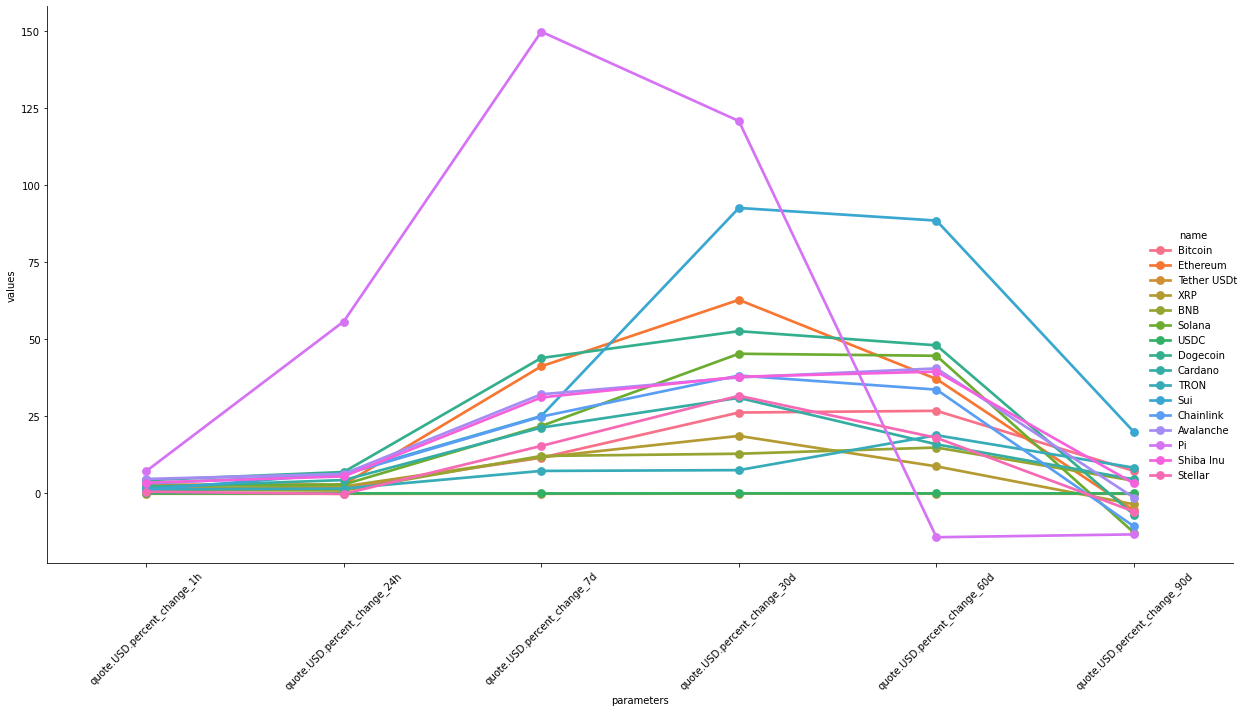

In [15]:
# Visualize average performance changes

sns.catplot(x='parameters', y='values', hue='name', data=df6, kind='point', height=10, aspect=1.6)
plt.xticks(rotation=45)  
plt.tight_layout()       
plt.show()

In [16]:
# Filter Bitcoin price data

df7 = df1[['name','quote.USD.price','timestamp']]
df7 = df7.query("name == 'Bitcoin'")
df7

name  quote.USD.price                  timestamp
0    Bitcoin     103163.70020 2025-05-10 10:48:25.860309
15   Bitcoin     103172.45986 2025-05-10 10:49:26.540456
30   Bitcoin     103151.53000 2025-05-10 10:50:29.824380
45   Bitcoin     103220.44708 2025-05-10 12:49:14.649571
60   Bitcoin     103222.89452 2025-05-10 12:50:15.898795
75   Bitcoin     103213.61765 2025-05-10 12:51:17.002659
90   Bitcoin     103216.70783 2025-05-10 12:52:18.620123
105  Bitcoin     103982.56173 2025-05-12 01:18:49.486176
120  Bitcoin     103987.14688 2025-05-12 01:19:50.333618
135  Bitcoin     103914.08184 2025-05-12 13:23:06.848435
150  Bitcoin     104008.56348 2025-05-12 13:24:07.866034
165  Bitcoin     104057.03759 2025-05-12 13:25:08.848039
180  Bitcoin     104035.28634 2025-05-12 13:26:09.812951
195  Bitcoin     104065.96734 2025-05-12 13:27:10.327330
210  Bitcoin     104112.33469 2025-05-12 13:28:11.461642
225  Bitcoin     104203.61952 2025-05-12 13:29:11.973805
240  Bitcoin     104220.82623 2025-05-12 13:30:13.107394
255  Bitcoin     104197.59415 2025-05-12 13:31:14.239635
270  Bitcoin     104233.78671 2025-05-12 13:32:15.063705
285  Bitcoin     104212.49705 2025-05-12 13:33:15.469091
300  Bitcoin     104203.55495 2025-05-12 13:34:16.154886
315  Bitcoin     104253.90054 2025-05-12 13:35:19.122278
330  Bitcoin     104271.15995 2025-05-12 13:36:24.216333
345  Bitcoin     104303.60512 2025-05-12 13:37:25.055441
360  Bitcoin     104305.19416 2025-05-12 13:38:26.176350
375  Bitcoin     104271.09957 2025-05-12 13:39:27.164042
390  Bitcoin     104306.70518 2025-05-12 13:40:28.134836
405  Bitcoin     104323.84855 2025-05-12 13:41:28.666217
420  Bitcoin     104351.76168 2025-05-12 13:42:29.595339
435  Bitcoin     104351.76168 2025-05-12 13:43:30.076386
450  Bitcoin     104342.48983 2025-05-12 13:44:30.716249
465  Bitcoin     104342.48983 2025-05-12 13:44:56.323105
480  Bitcoin     104335.40231 2025-05-12 13:45:31.901138
495  Bitcoin     104335.40231 2025-05-12 13:45:56.845415
510  Bitcoin     104374.02573 2025-05-12 13:46:33.074743
525  Bitcoin     104399.53685 2025-05-12 13:47:33.962300
540  Bitcoin     104405.20715 2025-05-12 13:48:35.054063
555  Bitcoin     104405.20715 2025-05-12 13:49:36.051741
570  Bitcoin     104405.20715 2025-05-12 13:50:37.330085
585  Bitcoin     104370.84335 2025-05-12 13:51:38.150462
600  Bitcoin     104297.28672 2025-05-12 13:52:39.197597
615  Bitcoin     104307.07960 2025-05-12 13:53:40.042898
630  Bitcoin     104309.74315 2025-05-12 13:54:40.534532
645  Bitcoin     104309.74315 2025-05-12 13:55:41.051237
660  Bitcoin     104325.17992 2025-05-12 13:56:41.874425
675  Bitcoin     104340.04269 2025-05-12 13:57:45.528393
690  Bitcoin     104340.04269 2025-05-12 13:58:46.072692
705  Bitcoin     104376.62124 2025-05-12 13:59:47.109156
720  Bitcoin     104379.91758 2025-05-12 14:00:48.253124
735  Bitcoin     104903.52192 2025-05-12 14:01:49.370126
750  Bitcoin     105150.82307 2025-05-12 14:02:50.815794
765  Bitcoin     105244.12073 2025-05-12 14:03:51.274095
780  Bitcoin     105379.82342 2025-05-12 14:04:51.906555
795  Bitcoin     105379.82342 2025-05-12 14:05:52.666364
810  Bitcoin     105379.82342 2025-05-12 14:06:53.205605
825  Bitcoin     105618.16360 2025-05-12 14:07:53.728129
840  Bitcoin     105257.75827 2025-05-12 14:08:54.831122
855  Bitcoin     105216.93281 2025-05-12 14:09:55.373212
870  Bitcoin     105337.65747 2025-05-12 14:10:55.859690
885  Bitcoin     105441.79532 2025-05-12 14:11:56.990786
900  Bitcoin     105390.72145 2025-05-12 14:12:57.599463
915  Bitcoin     105397.40104 2025-05-12 14:13:58.630392
930  Bitcoin     105397.40104 2025-05-12 14:14:59.053531
945  Bitcoin     105386.99757 2025-05-12 14:16:00.071982
960  Bitcoin     105386.99757 2025-05-12 14:16:18.715467
975  Bitcoin     105591.62185 2025-05-12 14:17:01.204792
990  Bitcoin     105591.62185 2025-05-12 14:17:19.636760

<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

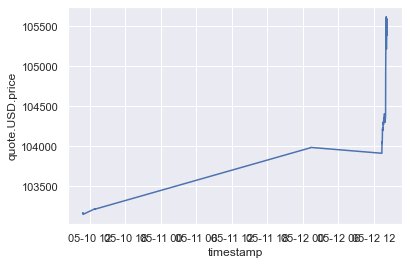

In [17]:
# Plot Bitcoin price over time
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data=df7)

## Conclusions

- Real-time data collection using CoinMarketCap’s API provides a reliable way to monitor cryptocurrency trends.

- From the point plot, we observe that certain cryptocurrencies exhibit higher short-term volatility compared to others.

- The historical price line plot for Bitcoin shows how price trends evolve over time, useful for tracking momentum or market sentiment.

- This project demonstrates the integration of API usage, data engineering, and basic data visualization—key skills for data analytics and engineering roles.

## Acknowledgment
This project was developed by following the tutorial by Alex The Analyst: Automating Crypto Website API Pull Using Python | Data Analyst Project
YouTube Link: https://www.youtube.com/watch?v=KB2CtEDrglY

Special thanks to Alex for the clear guidance and inspiration.